### Apply Decision Tree algorithm on titanic data
In this file using following columns build a model to predict if person would survive or not,

#Pclass
#Sex
#Age
#Fare

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,fair,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,fair
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
inputs = df.drop(['Survived'],axis='columns')
target = df.Survived

In [6]:
inputs.head()

,Pclass,Sex,Age,fair
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


## In above input features, Sex column has categorical data, ML algorithm understands only numeric values hence we need to convert in numbers

In [7]:
from sklearn.preprocessing import LabelEncoder
lb =LabelEncoder()

In [8]:
df['Sex'] = lb.fit_transform(df['Sex'])
inputs= df.iloc[:,1:]

In [ ]:
#OR another method is
#inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [10]:
inputs[:4]

,Pclass,Sex,Age,fair
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000


In [11]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int32  
 2   Age     714 non-null    float64
 3   fair    891 non-null    float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 24.5 KB


In [12]:
inputs.Age[:10]  #it includes NaN values 

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [13]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [14]:
inputs.Age.head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [22]:
#from sklearn import tree
#model = tree.DecisionTreeClassifier()
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [23]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
model.score(X_test,y_test)*100

77.6536312849162

In [25]:
model.score(X_train,y_train)*100

98.17415730337079

In [26]:
from sklearn import tree

[Text(108.62501016496283, 212.26285714285714, 'X[1] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(51.4957249070632, 201.90857142857143, 'X[0] <= 2.5\ngini = 0.365\nsamples = 241\nvalue = [58, 183]'),
 Text(18.66914498141264, 191.5542857142857, 'X[3] <= 26.125\ngini = 0.086\nsamples = 134\nvalue = [6, 128]'),
 Text(12.446096654275093, 181.2, 'X[2] <= 56.0\ngini = 0.198\nsamples = 45\nvalue = [5, 40]'),
 Text(9.956877323420075, 170.84571428571428, 'X[2] <= 37.0\ngini = 0.165\nsamples = 44\nvalue = [4, 40]'),
 Text(4.978438661710038, 160.49142857142857, 'X[3] <= 20.25\ngini = 0.108\nsamples = 35\nvalue = [2, 33]'),
 Text(2.489219330855019, 150.13714285714286, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(7.467657992565057, 150.13714285714286, 'X[2] <= 25.5\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(4.978438661710038, 139.78285714285715, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(9.956877323420075, 139.78285714285715, 'X[2] <= 27.5\ngini = 0.346\n

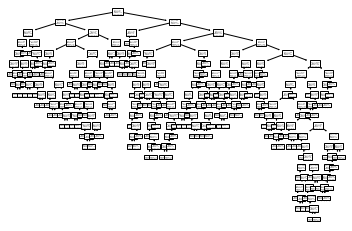

In [27]:
tree.plot_tree(model)

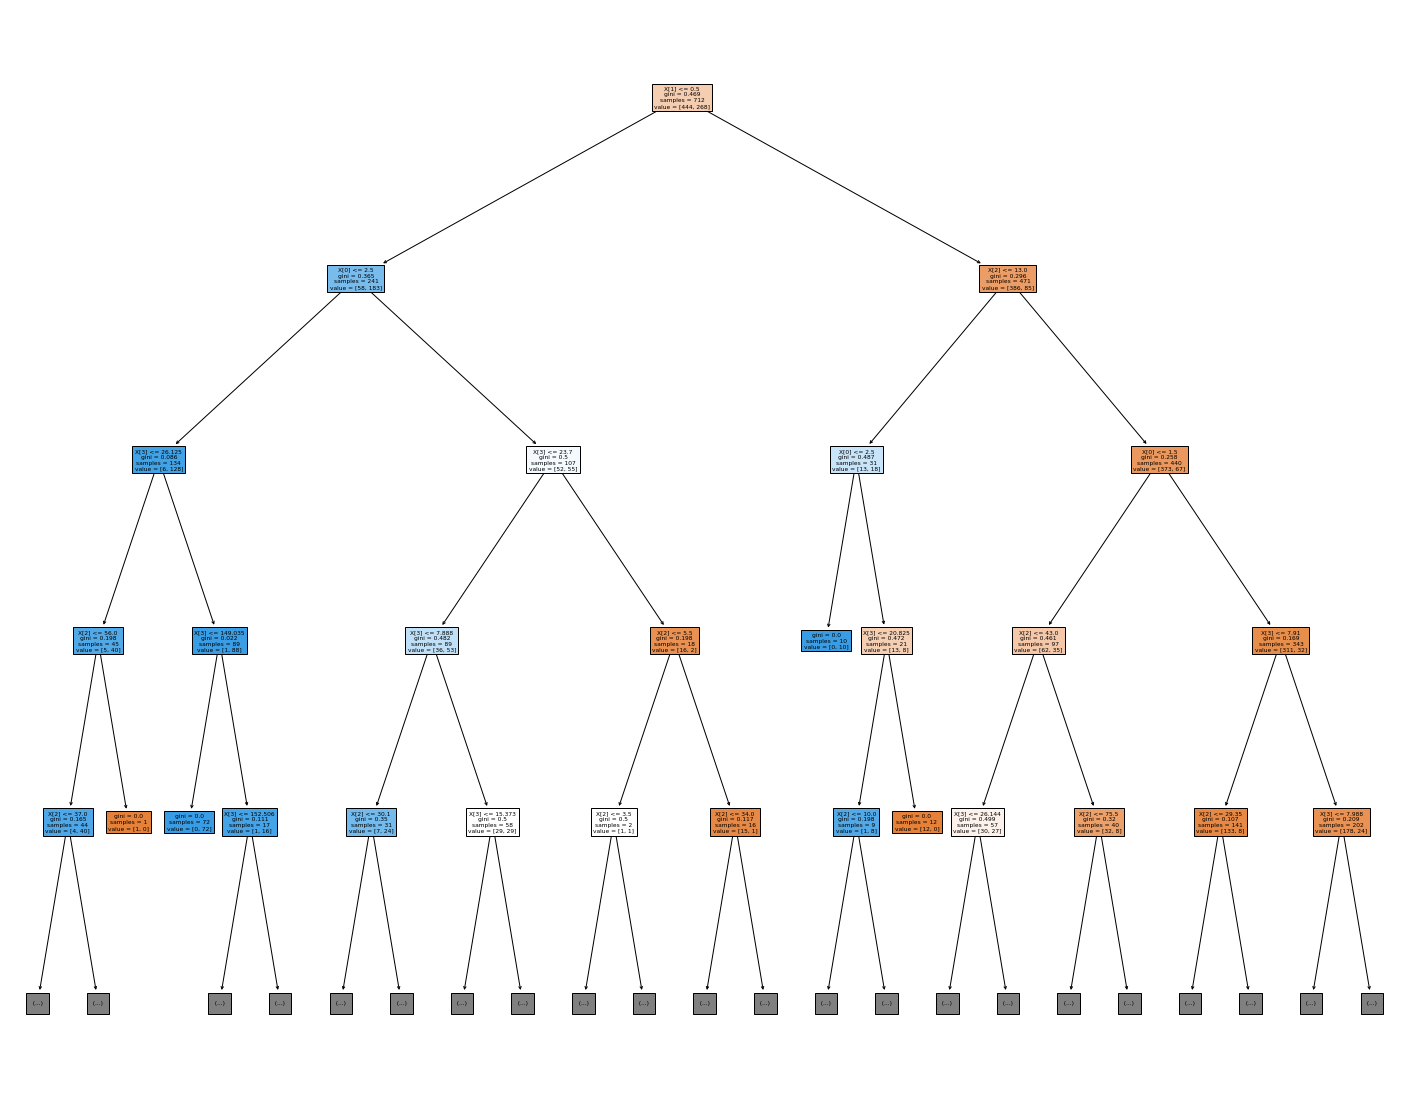

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, max_depth=4,
                   filled=True)
plt.savefig('dt.png',dpi=400)

In [36]:
!pip install graphviz

In [37]:
!pip install dtreeviz

In [38]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(model, inputs, target,
                )

viz

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH